# ShapeNet

## Dataset

In [1]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.ShapeNet.ShapeNetDataLoader import PartNormalDataset

from pytorch_lightning.loggers import WandbLogger

In [2]:
category = 'Airplane'
fixed_points = 1024
num_workers = 10
path = osp.realpath(osp.join('..', 'data', 'ShapeNet/raw'))

test_dataset = PartNormalDataset(root=path, npoints=fixed_points, split='test', class_choice=category)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=num_workers)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(1)

In [ ]:
points, label, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [3]:
import wandb
import yaml
from test import configure

In [4]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [5]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [6]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/2v1wlsu5')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [7]:
model, trainer = configure(config)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Gpu:  0


In [8]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/2v1wlsu5')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

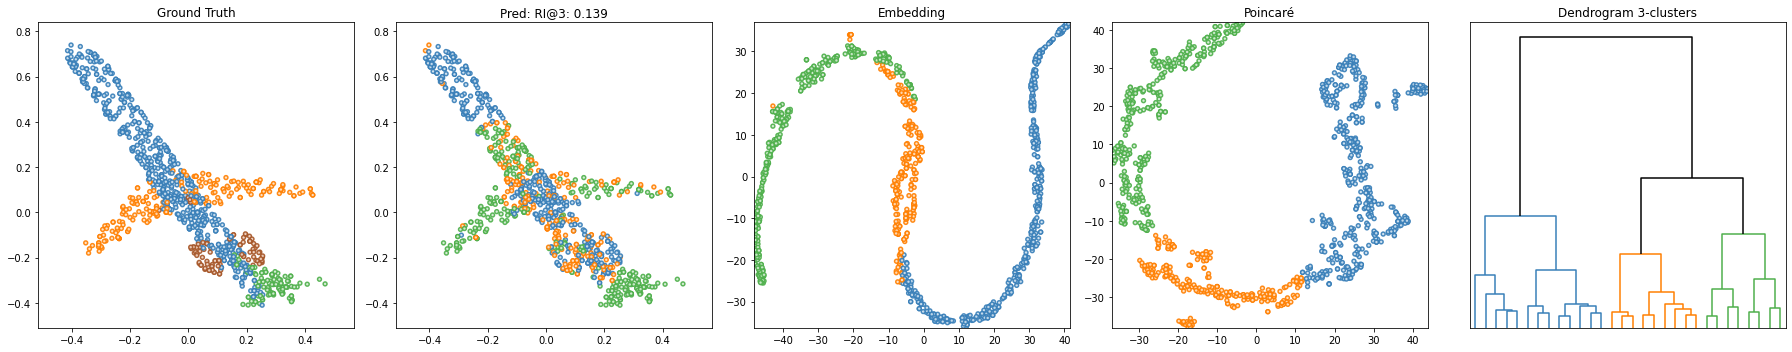

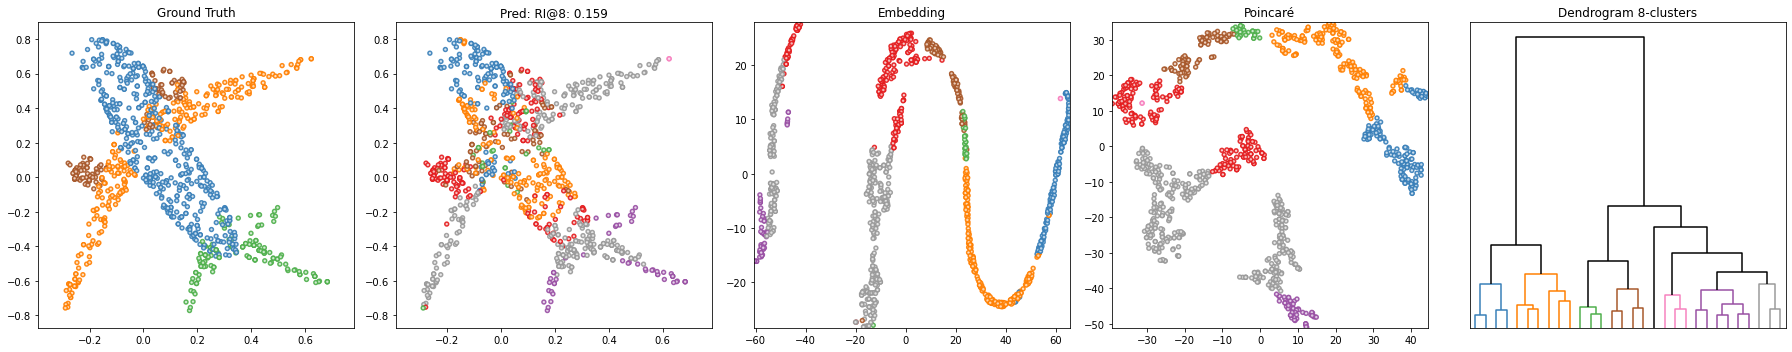

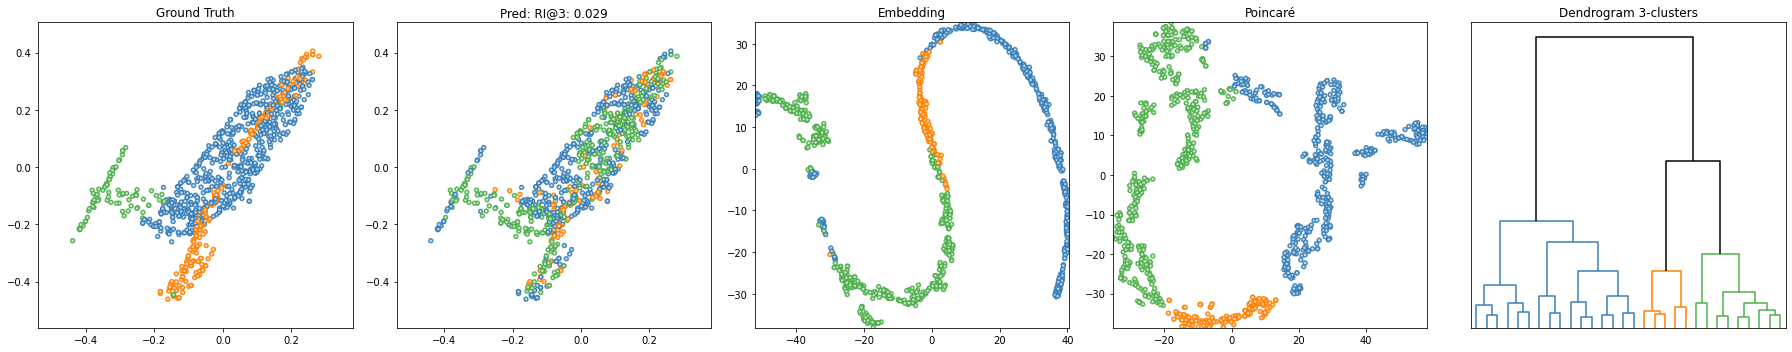

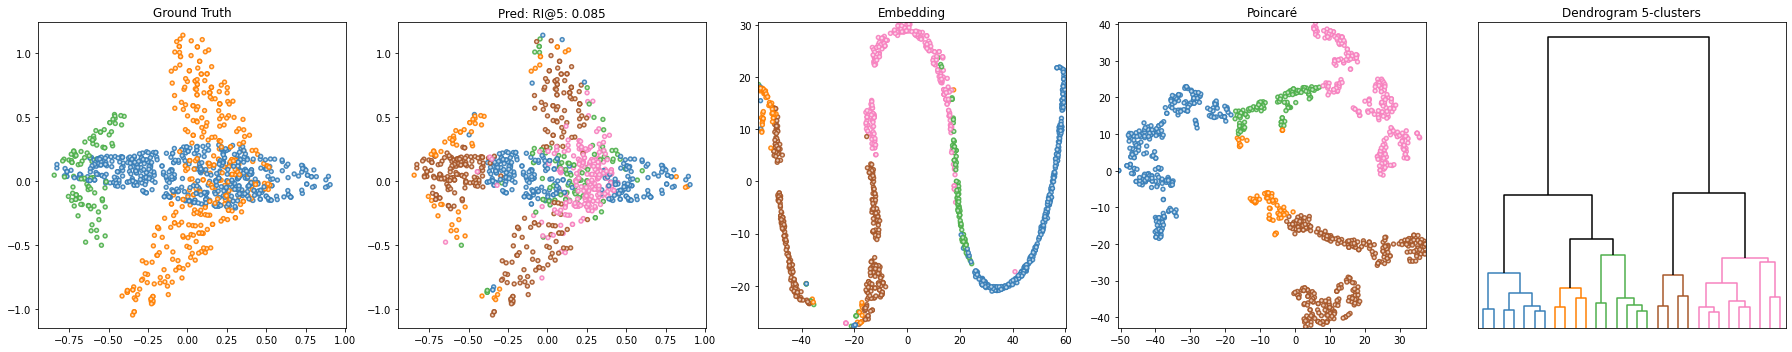

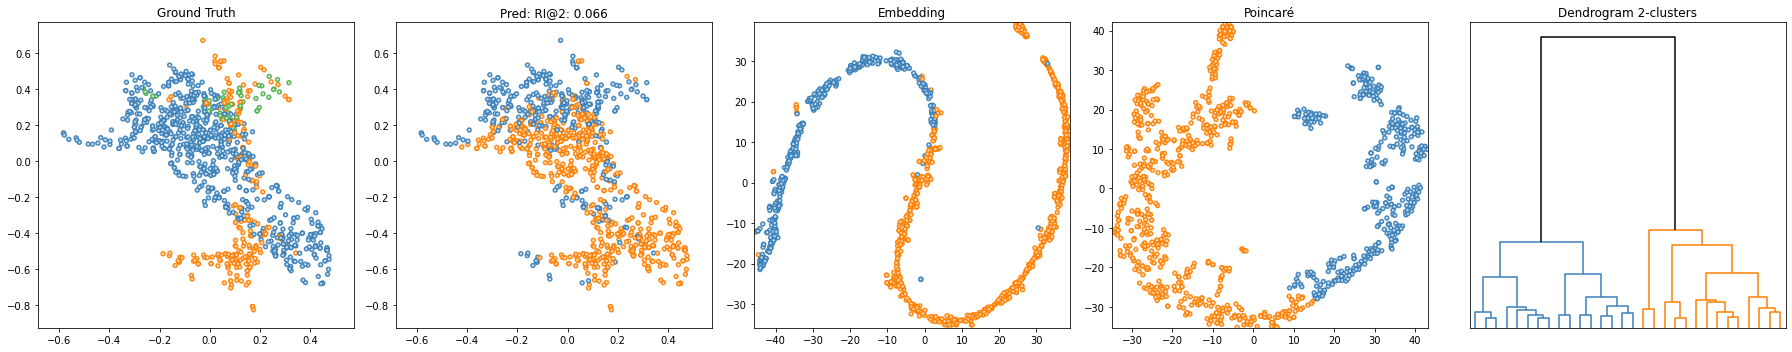

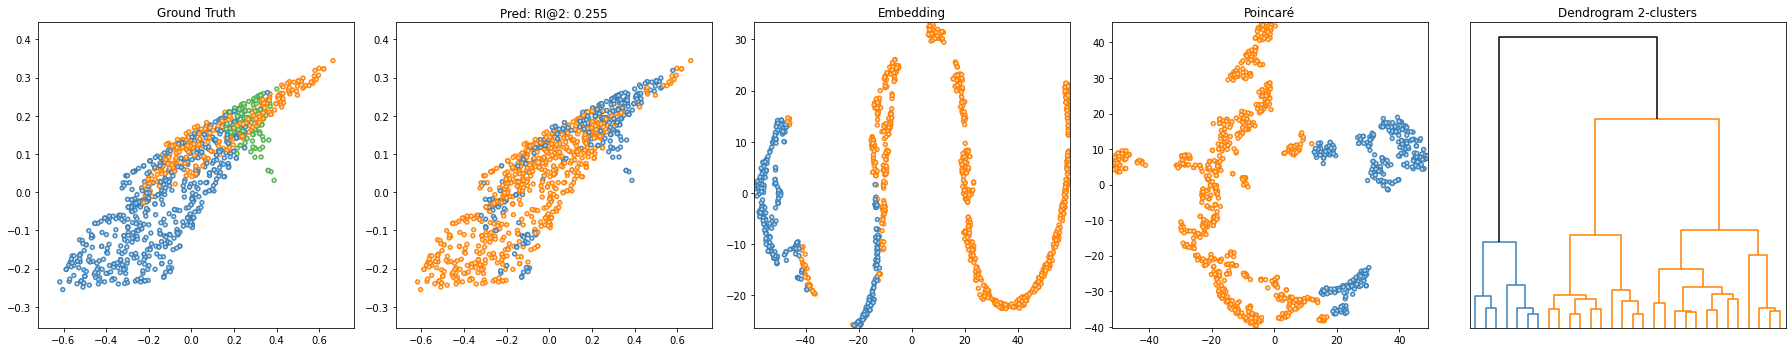

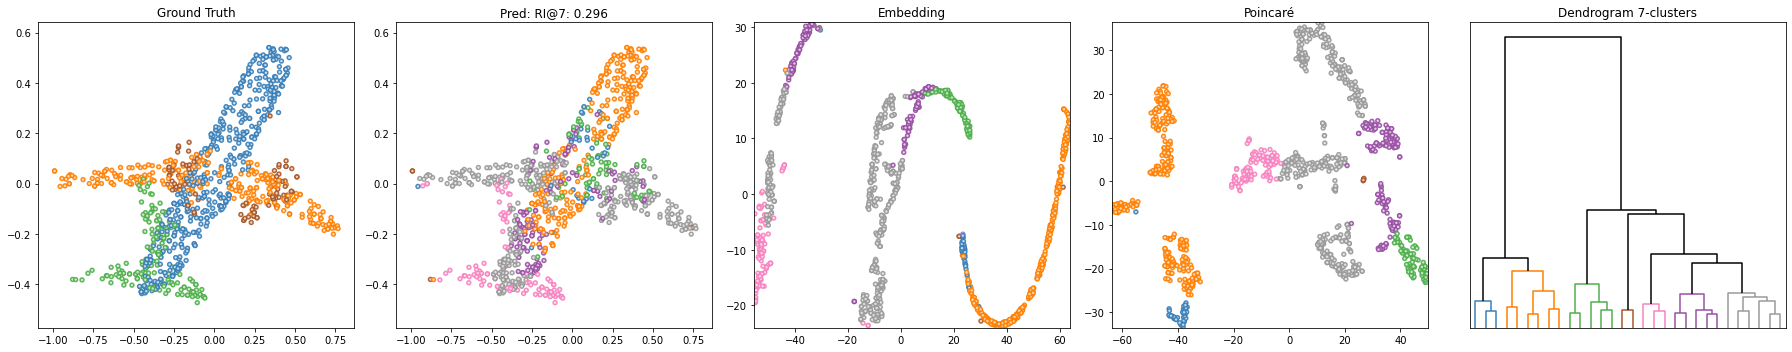

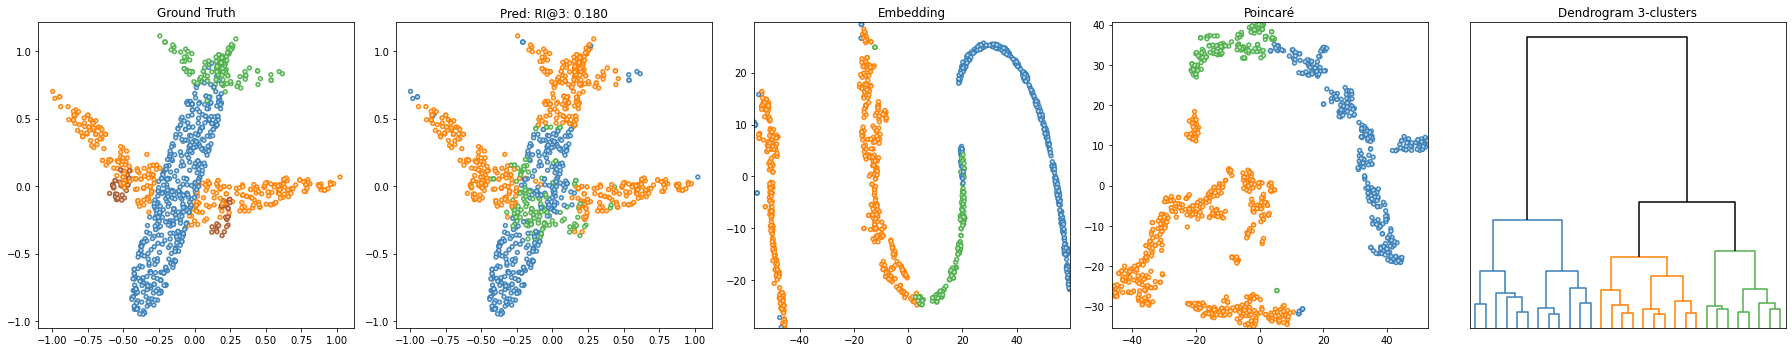

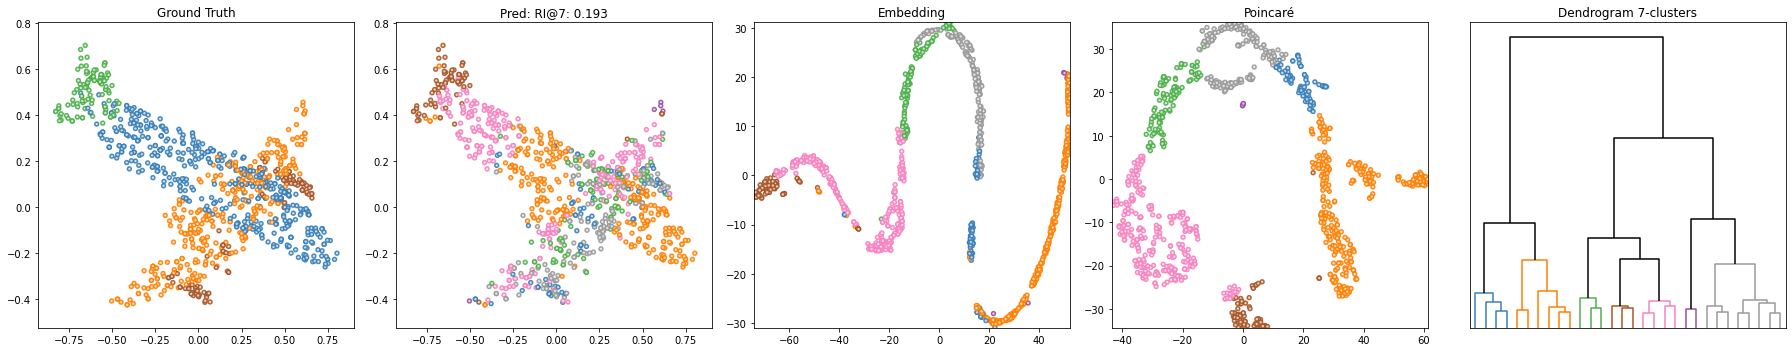

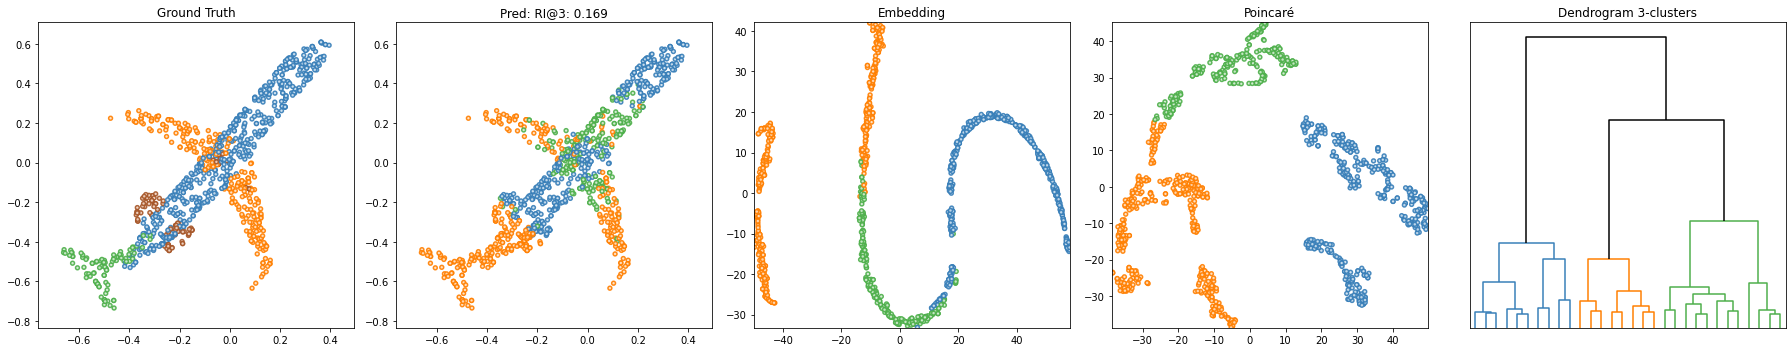

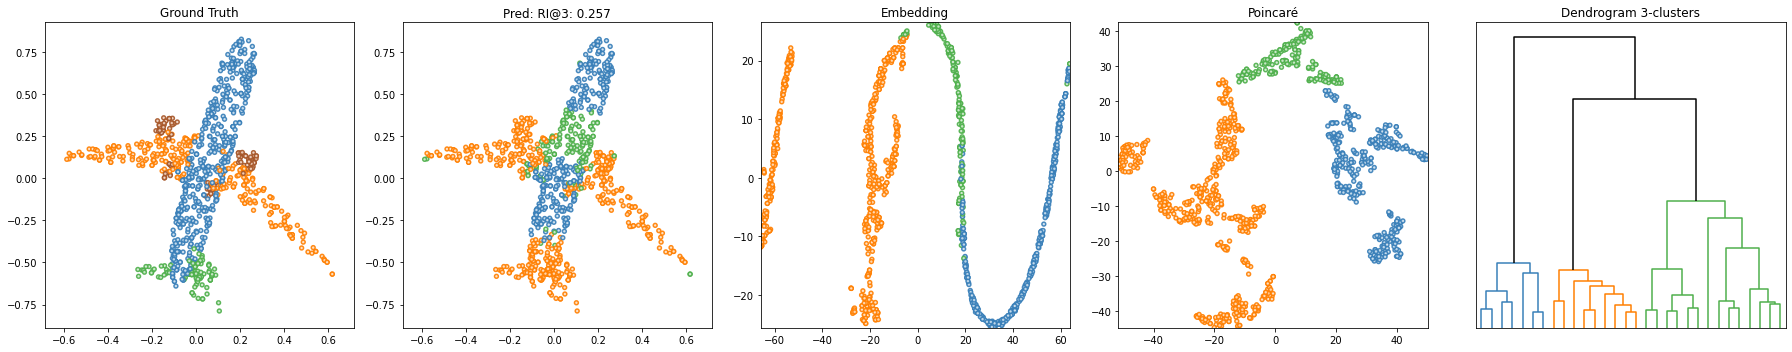

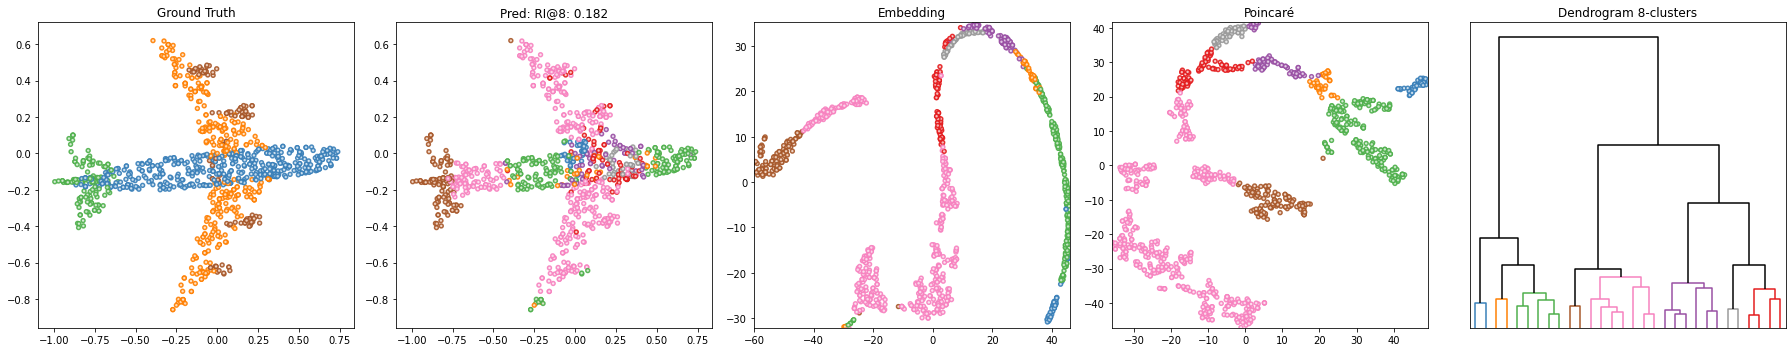

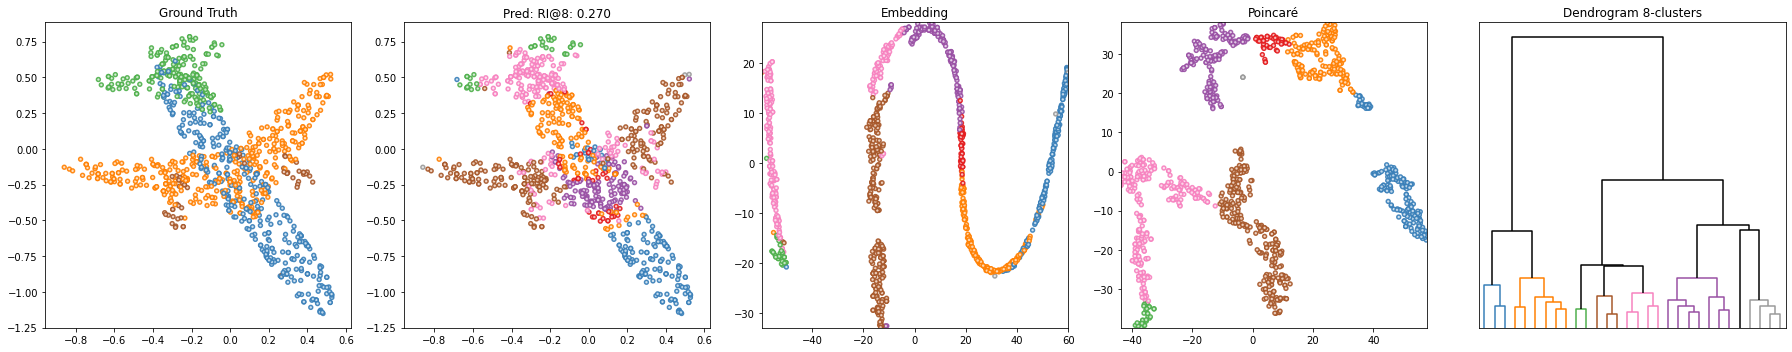

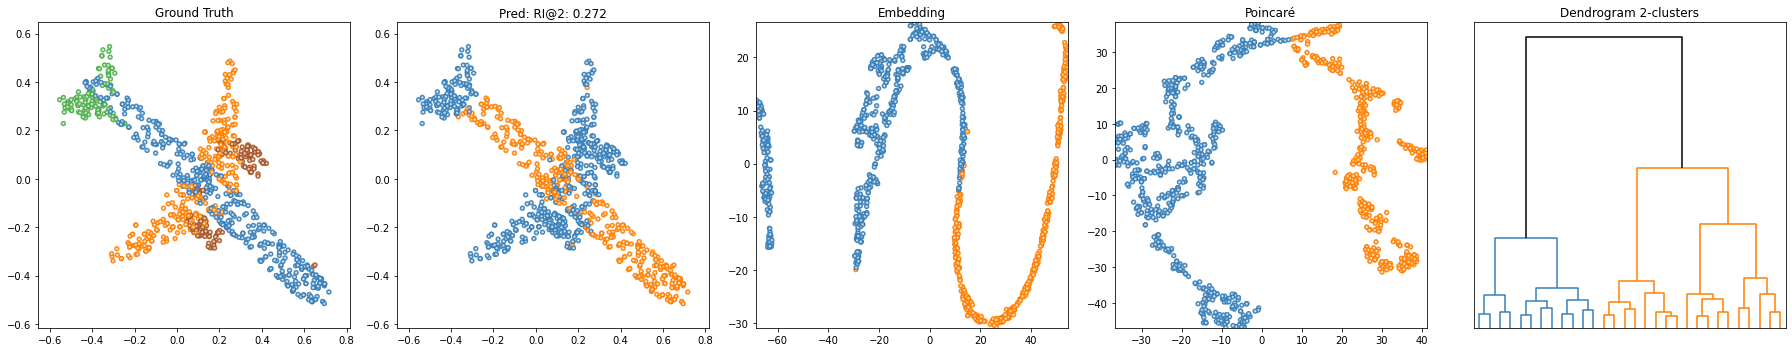

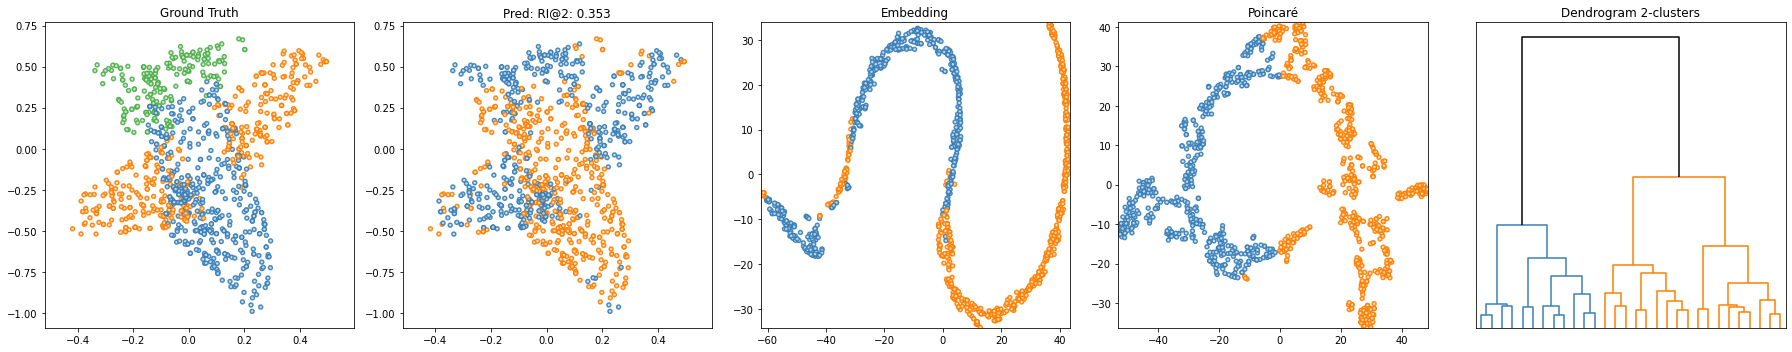

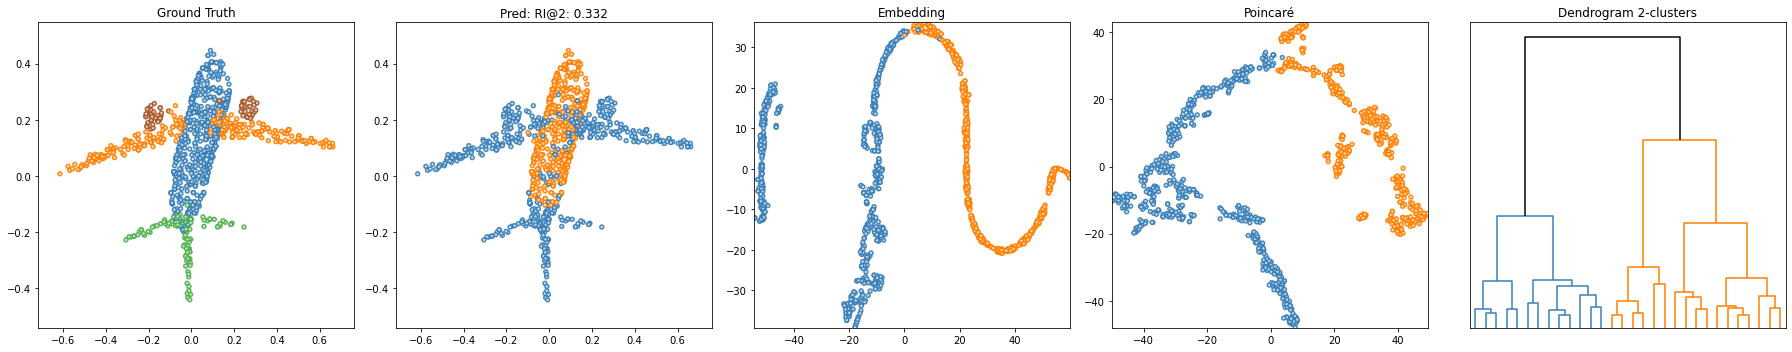

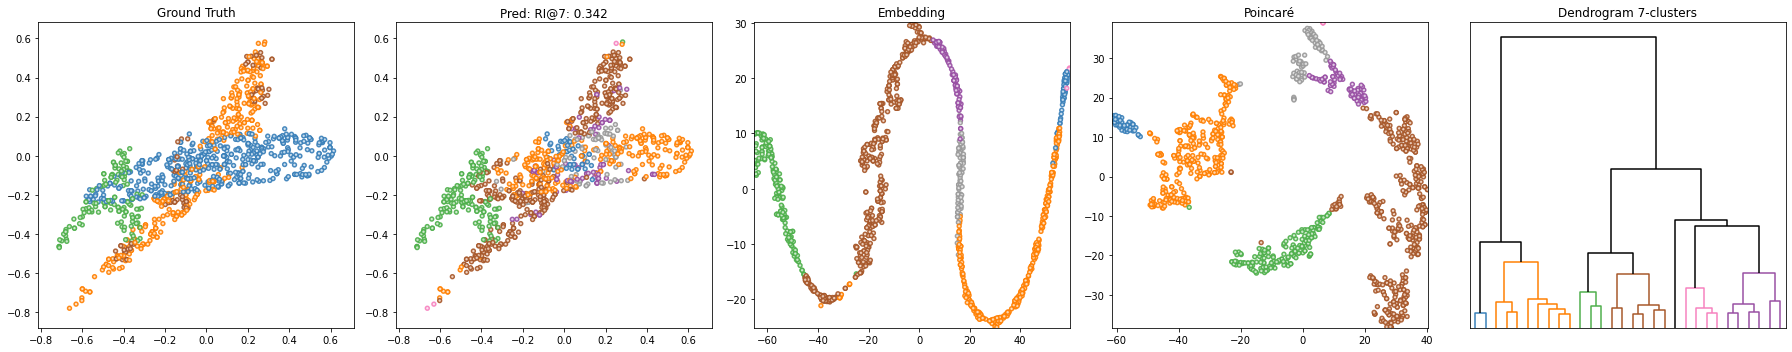

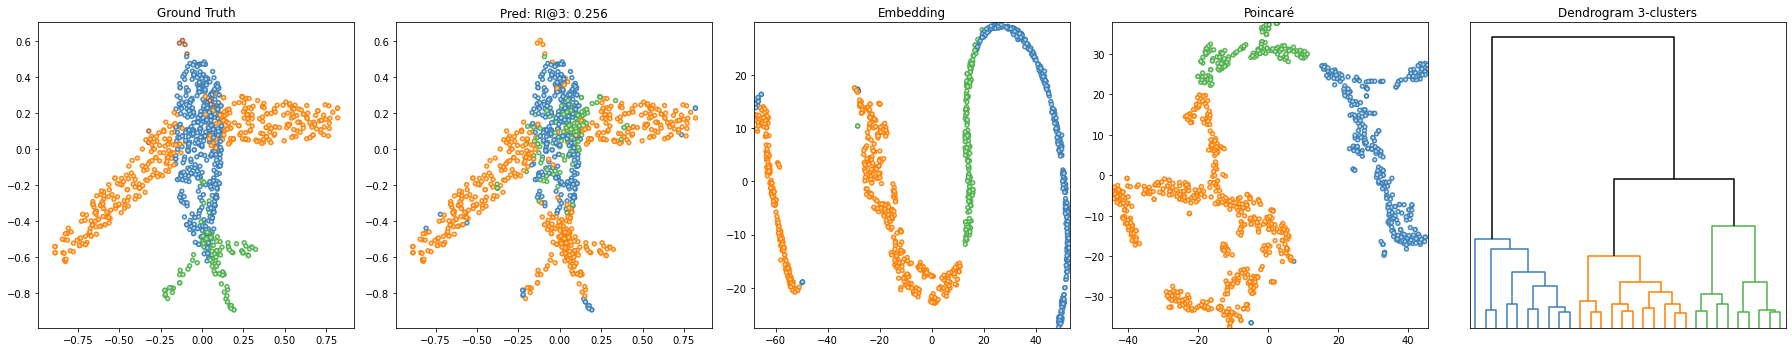

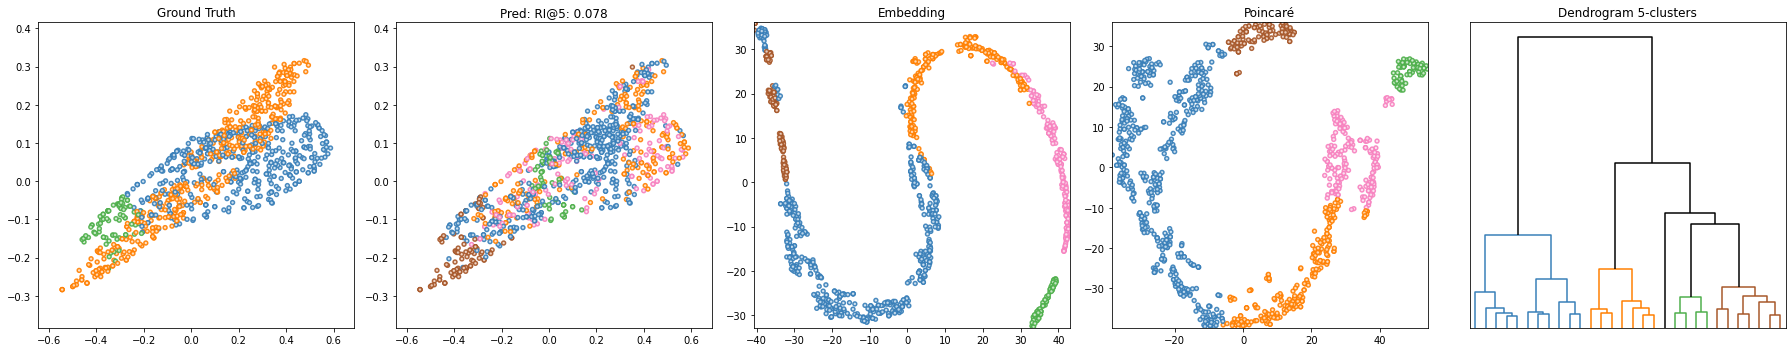

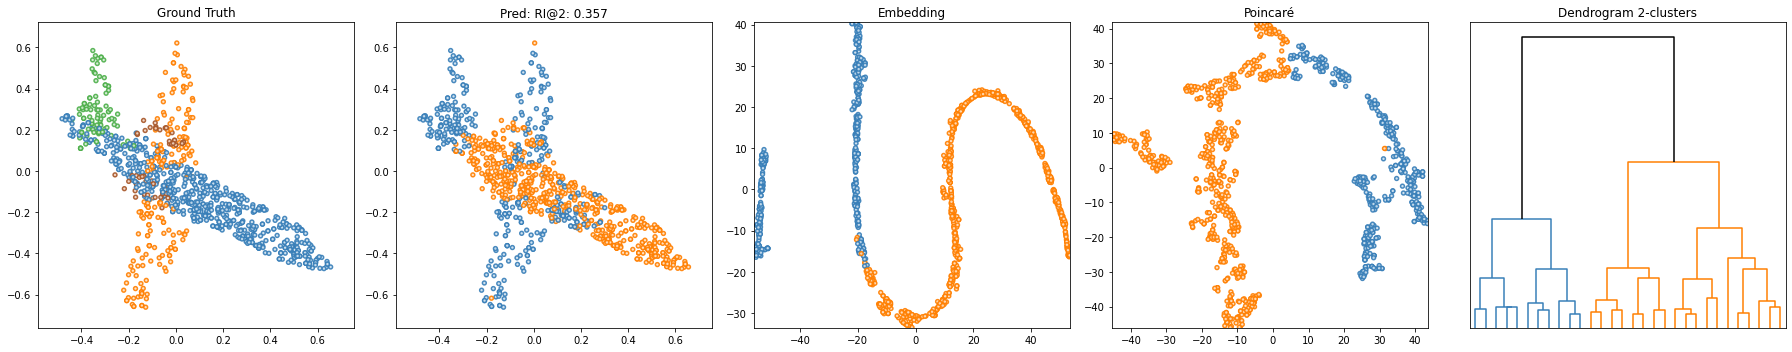

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.0765817165374756
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.0765817165374756}]

In [9]:
trainer.test(model, test_loader)

In [10]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

scale tensor([0.9529])
model.bn7.weight tensor([0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245])
model.bn7.bias tensor([-2.3821e-05, -6.0132e-05, -7.0332e-05, -5.8908e-05, -3.8243e-05,
         3.0372e-05, -4.3315e-05, -1.9281e-05, -6.1473e-06, -2.3134e-06,
        -3.0010e-05, -4.1821e-05,  4.8545e-04,  5.5711e-04, -7.5308e-05,
         7.9236e-04, -7.0132e-06, -7.3425e-05,  2.0089e-04, -8.3996e-06,
         2.5777e-04,  2.1401e-04, -7.1191e-05,  1.3465e-04, -2.2959e-05,
   

model.conv8.0.weight tensor([[[-2.3901e-02],
         [-1.0504e-02],
         [ 4.7479e-02],
         ...,
         [-3.1344e-02],
         [-4.3367e-02],
         [-7.1419e-02]],

        [[-5.9299e-02],
         [-3.8043e-02],
         [-3.9448e-02],
         ...,
         [-2.8642e-02],
         [ 3.0407e-03],
         [ 7.0752e-03]],

        [[-5.7299e-04],
         [ 1.9783e-02],
         [-6.7974e-05],
         ...,
         [ 7.0697e-03],
         [ 4.3882e-02],
         [ 3.4694e-02]],

        ...,

        [[-1.0802e-02],
         [-2.9862e-03],
         [-2.6833e-02],
         ...,
         [-1.0094e-01],
         [-3.5098e-02],
         [-9.9331e-02]],

        [[ 1.3295e-02],
         [-1.9879e-02],
         [-4.0763e-03],
         ...,
         [ 1.4292e-02],
         [-6.6226e-02],
         [-1.2766e-01]],

        [[-1.5661e-02],
         [ 5.3737e-03],
         [-3.5685e-02],
         ...,
         [ 2.1424e-02],
         [-6.4683e-02],
         [-5.0177e-02]]])
model